In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet 
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

/Users/polfuentes/opt/anaconda3/envs/LauzHack/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../clean_data/BRISTOR_Zegoland_all_%.csv')

df = df.drop(columns=['Data_type', 'Measure', 'Country', 'Product', 'voiceShareA', 'voiceShareB'])



In [3]:
df_train = df[df['Date'] < '2023-11-01']
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                24 non-null     object 
 1   Value               24 non-null     float64
 2   demandA             24 non-null     float64
 3   demandB             24 non-null     float64
 4   demandCompA         24 non-null     float64
 5   DemandShareA        24 non-null     float64
 6   newPatientShareA    24 non-null     float64
 7   newPatientShareB    24 non-null     float64
 8   totalPatientShareA  24 non-null     float64
 9   totalPatientShareB  24 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB
None


In [4]:
df_test = df[df['Date'] >= '2023-11-01']
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 24 to 30
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                7 non-null      object 
 1   Value               7 non-null      float64
 2   demandA             7 non-null      float64
 3   demandB             7 non-null      float64
 4   demandCompA         7 non-null      float64
 5   DemandShareA        7 non-null      float64
 6   newPatientShareA    7 non-null      float64
 7   newPatientShareB    7 non-null      float64
 8   totalPatientShareA  7 non-null      float64
 9   totalPatientShareB  7 non-null      float64
dtypes: float64(9), object(1)
memory usage: 616.0+ bytes
None


In [5]:
df_test.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)
df_test.head(5)

/var/folders/vp/3088hxcd4dv_l_s0vtn_l2q80000gn/T/ipykernel_29724/1889246356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)


,ds,y,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
24,2023-11-01,100782.78,99170.401686,426.660766,3.862052e+06,0.025035,0.05,0.033,0.03,0.013
25,2023-12-01,96628.98,92128.061740,510.902080,3.600938e+06,0.024946,0.04,0.029,0.03,0.012
26,2024-01-01,109284.96,105609.366866,490.508487,3.954515e+06,0.026011,0.04,0.021,0.03,0.012
27,2024-02-01,87933.60,99594.883198,448.705210,3.732976e+06,0.025986,0.05,0.022,0.03,0.013
28,2024-03-01,91203.28,100535.360644,423.473075,3.617622e+06,0.027039,0.05,0.032,0.03,0.013


In [6]:
df_train.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)

/var/folders/vp/3088hxcd4dv_l_s0vtn_l2q80000gn/T/ipykernel_29724/3110268531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)


In [7]:
model = Prophet()
#model.add_regressor('demandB', standardize=True)
#model.add_regressor('demandA', standardize=True)
#model.add_regressor('demandCompA', standardize=True)
#model.add_regressor('DemandShareA', standardize=False)
#model.add_regressor('newPatientShareA', standardize=True)
#model.add_regressor('newPatientShareB', standardize=True)
model.add_regressor('totalPatientShareA', standardize=True)
#model.add_regressor('totalPatientShareB', standardize=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=3, prior_scale=0.1)


model.fit(df_train)

06:11:44 - cmdstanpy - INFO - Chain [1] start processing
06:11:44 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
import pickle

# Save the trained model to a file
with open("../models/xgBoostMultivariate.pkl", "wb") as f:
    pickle.dump(model, f)


In [8]:
df_test2 = df.drop(columns=['Value'])
df_test2 = df_test2.rename(columns={'Date':'ds'})

df_test2.head(10)

,ds,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
0,2021-11-01,50690.626885,2.000000,3.614874e+06,0.013829,0.05,0.001,0.01,0.000
1,2021-12-01,50570.861295,54.000000,3.602962e+06,0.013842,0.06,0.021,0.01,0.001
2,2022-01-01,50917.380645,86.814883,3.601168e+06,0.013942,0.05,0.026,0.01,0.002
3,2022-02-01,50780.830461,117.704204,3.373471e+06,0.014830,0.04,0.041,0.02,0.004
4,2022-03-01,62515.496098,175.611087,3.723241e+06,0.016513,0.05,0.028,0.02,0.005
5,2022-04-01,61091.127556,110.757450,3.500161e+06,0.017154,0.05,0.025,0.02,0.005
6,2022-05-01,67640.897110,208.606122,3.750983e+06,0.017713,0.04,0.024,0.02,0.006
7,2022-06-01,66007.870399,186.875494,3.452332e+06,0.018761,0.04,0.032,0.02,0.006
8,2022-07-01,73846.000000,197.000000,3.811340e+06,0.019007,0.05,0.035,0.02,0.007
9,2022-08-01,75905.000000,217.000000,3.634373e+06,0.020458,0.05,0.030,0.02,0.008


In [253]:
forecast1 = model.predict(df_test2)
forecast1 = forecast1[['ds', 'yhat']]
forecast1.head(10)

,ds,yhat
0,2021-11-01,37176.908407
1,2021-12-01,38253.768422
2,2022-01-01,40018.504153
3,2022-02-01,50959.226996
4,2022-03-01,50154.129495
5,2022-04-01,52213.190944
6,2022-05-01,52995.725243
7,2022-06-01,55054.786692
8,2022-07-01,55837.320992
9,2022-08-01,57896.382441


In [254]:
#calculate RMSE

y = df_test['y'].values
yhat = forecast1['yhat'].values

sumerror= 0
for i in range(len(y)):
    sumerror += (y[i] - yhat[i])**2

rmse = np.sqrt(sumerror/len(y))
    
print(rmse)

52337.222935471924


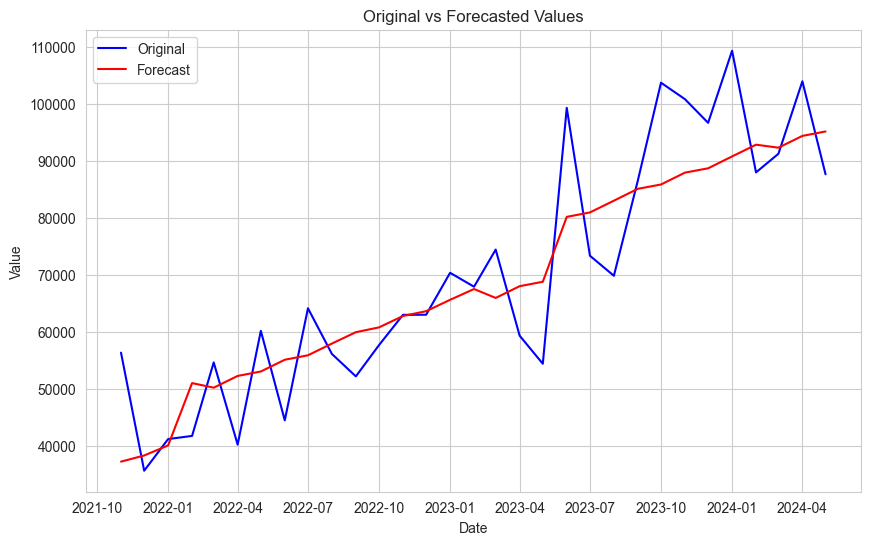

In [255]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
forecast1['ds'] = pd.to_datetime(forecast1['ds'])

# Ensure the data aligns properly
plt.figure(figsize=(10, 6))

# Plot the original values (test set)
plt.plot(df['Date'], df['Value'], label='Original', color='blue')

# Plot the forecasted values
plt.plot(forecast1['ds'], forecast1['yhat'], label='Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original vs Forecasted Values')
plt.legend()

# Show the plot
plt.show()




In [256]:

df



model.predict()






,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,monthly,monthly_lower,monthly_upper,totalPatientShareA,totalPatientShareA_lower,totalPatientShareA_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-01,44942.834328,24786.323877,49228.353154,44942.834328,44942.834328,-7765.925920,-7765.925920,-7765.925920,-10099.737967,...,2333.812046,2333.812046,2333.812046,-10099.737967,-10099.737967,-10099.737967,0.0,0.0,0.0,37176.908407
1,2021-12-01,46340.340432,25573.287571,50908.568550,46340.340432,46340.340432,-8086.572010,-8086.572010,-8086.572010,-10099.737967,...,2013.165957,2013.165957,2013.165957,-10099.737967,-10099.737967,-10099.737967,0.0,0.0,0.0,38253.768422
2,2022-01-01,47784.430073,27083.040319,51673.326243,47784.430073,47784.430073,-7765.925920,-7765.925920,-7765.925920,-10099.737967,...,2333.812046,2333.812046,2333.812046,-10099.737967,-10099.737967,-10099.737967,0.0,0.0,0.0,40018.504153
3,2022-02-01,49228.519713,39005.367399,63339.971018,49228.519713,49228.519713,1730.707283,1730.707283,1730.707283,-776.902921,...,2507.610203,2507.610203,2507.610203,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,50959.226996
4,2022-03-01,50532.858744,38655.856796,62564.495689,50532.858744,50532.858744,-378.729249,-378.729249,-378.729249,-776.902921,...,398.173672,398.173672,398.173672,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,50154.129495
5,2022-04-01,51976.948386,39611.847554,64528.926193,51976.948386,51976.948386,236.242557,236.242557,236.242557,-776.902921,...,1013.145478,1013.145478,1013.145478,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,52213.190944
6,2022-05-01,53374.454492,41168.186455,64736.071139,53374.454492,53374.454492,-378.729249,-378.729249,-378.729249,-776.902921,...,398.173672,398.173672,398.173672,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,52995.725243
7,2022-06-01,54818.544135,43514.530106,67862.010921,54818.544135,54818.544135,236.242557,236.242557,236.242557,-776.902921,...,1013.145478,1013.145478,1013.145478,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,55054.786692
8,2022-07-01,56216.050241,43637.034812,67906.598307,56216.050241,56216.050241,-378.729249,-378.729249,-378.729249,-776.902921,...,398.173672,398.173672,398.173672,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,55837.320992
9,2022-08-01,57660.139883,46029.328931,69533.505828,57660.139883,57660.139883,236.242557,236.242557,236.242557,-776.902921,...,1013.145478,1013.145478,1013.145478,-776.902921,-776.902921,-776.902921,0.0,0.0,0.0,57896.382441
